In [1]:
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from itertools import cycle

In [2]:
y,sr= librosa.load(r"C:\Users\jasvi\Downloads\speechsignal.wav")

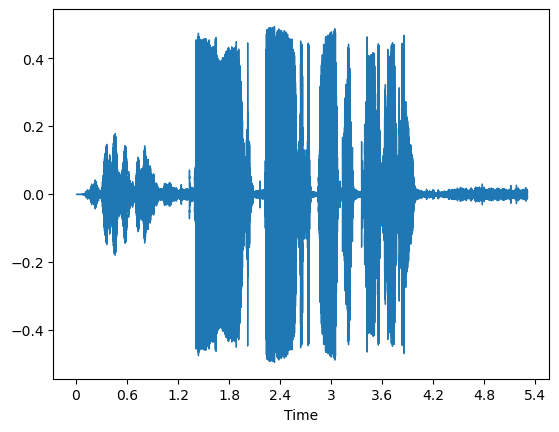

In [4]:
librosa.display.waveshow(y)

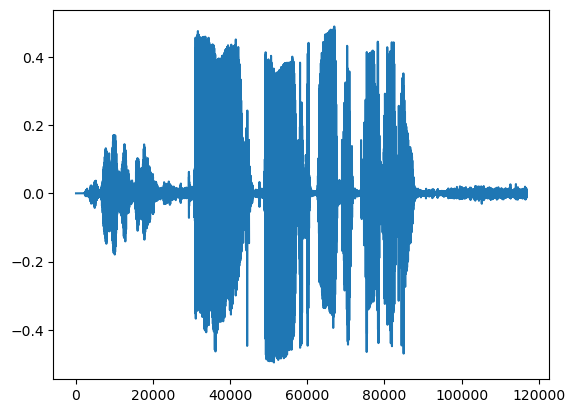

In [62]:
plt.plot(y)

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the 
amplitude part of the spectral components and observe it

In [70]:
import numpy as np
arr1 = np.fft.fft(y)

In [8]:
arr1 #Speech signal in spectral domain

array([-3.53094946-3.77475828e-15j,  0.42807074-3.43217779e+00j,
        0.96896609+5.65233111e+00j, ..., -1.24051311+4.63085615e+00j,
        0.96896609-5.65233111e+00j,  0.42807074+3.43217779e+00j])

Text(0.5, 1.0, 'Absolute part of the spectral components')

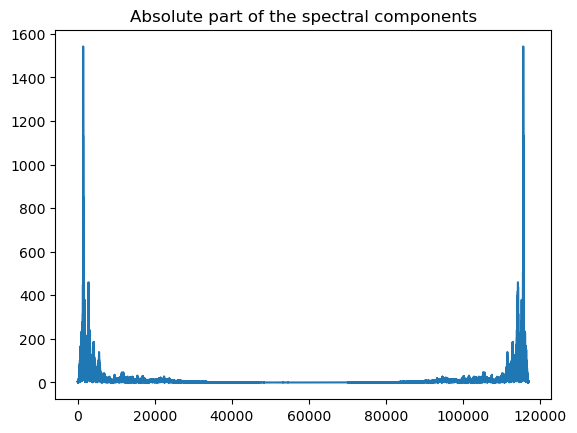

In [31]:
import matplotlib.pyplot as plt
plt.plot(np.abs(arr1))
plt.title("Absolute part of the spectral components")

2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal 
from frequency domain to time domain. Compare the generated time domain signal with the 
original signal.

In [25]:
arr2= np.fft.ifft(arr1)
print("Inverse fourier transform of the frequency spectrum:",
      arr2) 

Inverse fourier transform of the frequency spectrum: [ 4.85722573e-17-1.31838984e-16j -1.04085645e-16+8.32639310e-17j
  5.55022041e-17+8.32726909e-17j ...  3.60836205e-03-1.01823525e-16j
  7.47827580e-03-9.11735677e-18j  2.42838221e-17+8.58694644e-17j]


Text(0, 0.5, 'Amplitude')

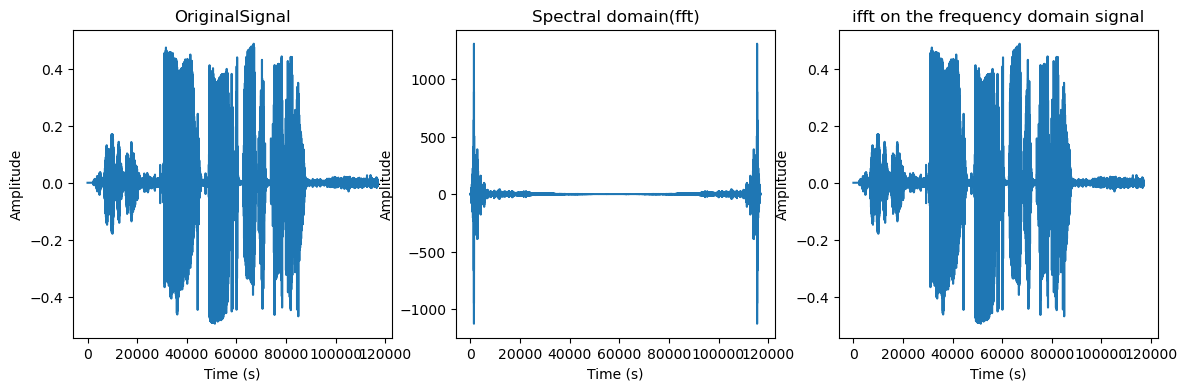

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(y)
plt.title('OriginalSignal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 2)
plt.plot(arr1)
plt.title("Spectral domain(fft)")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 3)
plt.plot(arr2)
plt.title("ifft on the frequency domain signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [34]:
#Listening to the audio signals
Audio(data=arr1, rate=sr) 

#The Fourier transform signal have high amplitude at the start and end of the signal

In [33]:
Audio(data=arr2, rate=sr)


 When the signal is converted back into the time domain from frequency domain it sounds and looks and exactly like the original signal 

A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum 
with the spectrum of the full signal.

In [39]:
# To find a word in the recorded speech, let us split the signal
nonmutesections= librosa.effects.split(y, top_db=20)

In [40]:
nonmutesections

array([[ 6656, 14336],
       [15360, 19968],
       [30208, 46080],
       [48128, 61440],
       [62464, 72192],
       [74240, 88064]])

In [68]:
word=y[74240: 88064]
Audio(data=y[74240: 88064], rate=sr) #Audio of the word "Processing"

Text(0, 0.5, 'Amplitude')

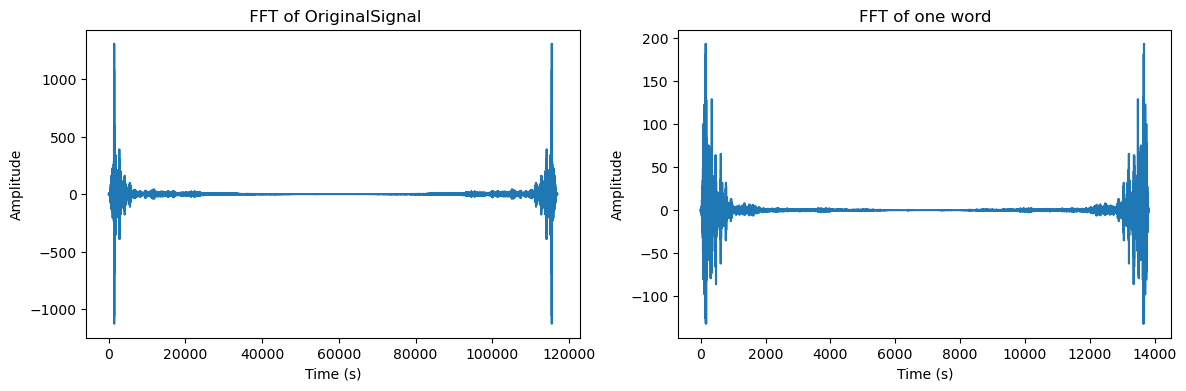

In [84]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
arr3 = np.fft.fft(word)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(arr1)
plt.title(' FFT of OriginalSignal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(arr3)
plt.title("FFT of one word")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

The spectrum of full signal and original signal look similar in structure. The fft signal spectrum is symmetrical. The first half we get the frequency components in the signal


A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the 
spectral components.


450


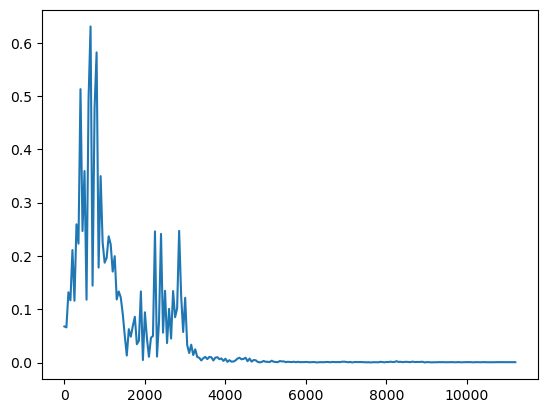

In [101]:
time= 20e-3
samplingrate=22500
window_length = int(time*samplingrate)
print(window_length)
rectangular_window= y[48128:48128+window_length] # A rectangular window of signal of 20ms
fft_signal= np.fft.fft(rectangular_window)
frequency_axis = np.fft.fftfreq(window_length, d=1/sampling_rate)
plt.plot(frequency_axis[:window_length//2], np.abs(fft_signal)[:window_length//2])



From the FFT signal, we can check the frequency distribution of the signal of the window 20ms

A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency 
components using numpy.fft.rfft(). Stack these frequency components as columns in a 
matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or 
scipy.signal.stft() as well to achieve this

In [155]:
time= 20e-3
print("Time taken by the signal in sec:", len(y)/sr)

a=sr*time
matrix=[]

i1=0

for i in range(0,int(len(y)/a)):
    
    y1= y[i1:i1+int(a)]
   
    arr= np.fft.rfft(y1)
    matrix.append(arr)
    i1=i1+ int(a)
matrix1= np.matrix(matrix)
matrix = matrix1.transpose() # each column now has frequency components of window size 20ms
    

Time taken by the signal in sec: 5.304036281179139


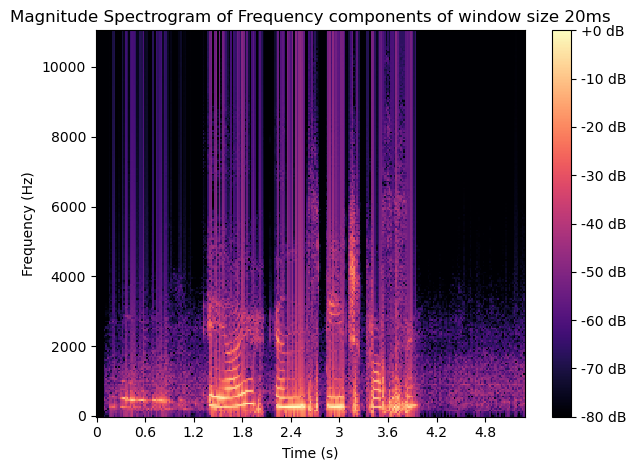

In [160]:
librosa.display.specshow(librosa.amplitude_to_db(np.abs(matrix), ref=np.max), sr=sr, hop_length=window_length, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrogram of Frequency components of window size 20ms')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the 
same duration. Compare the plots.

C:\Users\jasvi\AppData\Local\Temp\ipykernel_21932\940334666.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto')


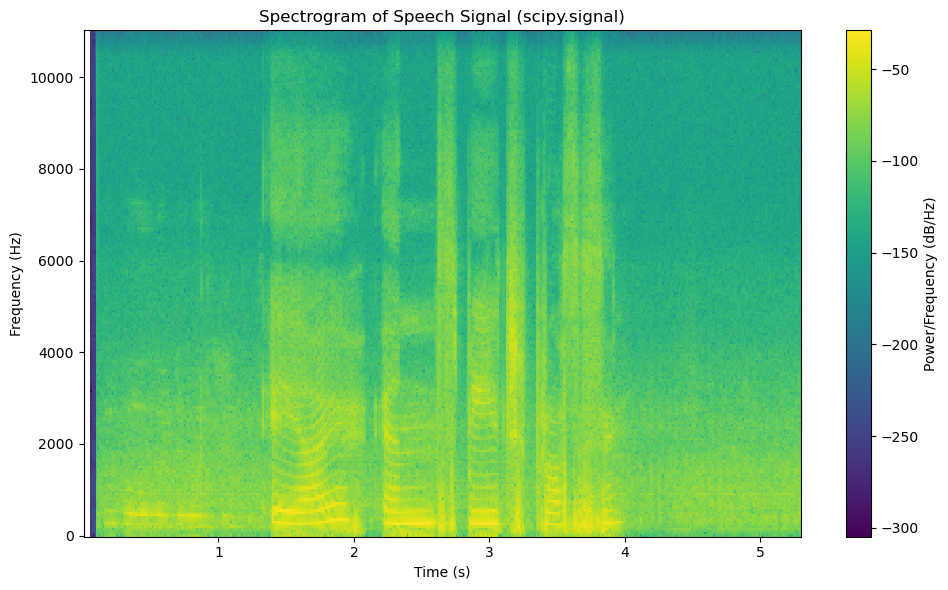

In [161]:
from scipy.signal import spectrogram
window_length = int(time*sr)
hop_size = int(time * sr / 2)
frequencies, times, spectrogram_data = spectrogram(y, fs=sr, nperseg=window_length, noverlap=hop_size)
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram of Speech Signal (scipy.signal)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

Both of the spectrograms look similar. Window size of both the spectrograms is 20ms